# What are the most frequently used Computer Skills in Toronto?

In [3]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from matplotlib.pyplot import plot

In [4]:
# Read the data from the result of the query file
#Download data from "http://data.stackexchange.com/stackoverflow/query/edit/877382"
df=pd.read_csv("Toronto20170708_20180707.csv", sep=',')

In [5]:
df1 = df.loc[:, ['Date','TagName','TagId']]#.sort_values(('Date'),ascending=False)
#df1.describe()
print('We are investigating', len(df1), 'posts from', min(df1['Date']),'to', max(df1['Date']))
#print(df1.sort_values(('Date'),ascending=False))
df2 = df1.loc[:, ['TagName','TagId']]
df3 = df2.groupby(['TagName']).agg({'count'})
#print(df2)
#df2.describe()
#list(df2)
df4 = df3.sort_values(('TagId','count'),ascending=False).head(10)
print(df4)

We are investigating 11707 posts from 2017-07-08 03:48:34 to 2018-07-06 21:21:11
           TagId
           count
TagName         
javascript   442
python       325
android      301
php          288
java         272
ios          196
html         167
c            150
c#           148
sql          129


# Plot 1

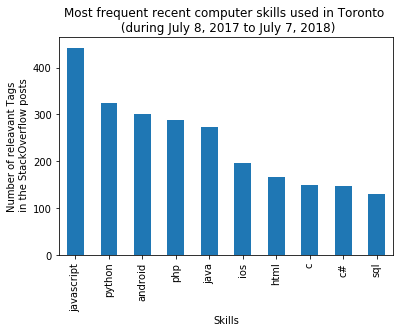

In [6]:
fig = df4.plot.bar(title = 'Most frequent recent computer skills used in Toronto \n (during July 8, 2017 to July 7, 2018)');
fig.legend_.remove();
fig.set_xlabel("Skills");
fig.set_ylabel("Number of releavant Tags\n in the StackOverflow posts");

In [7]:
LocationsList = df['Location'].tolist()
myset = set(LocationsList)
print(myset)
print('The post are from', len(myset), 'locations.')

{'Toronto', 'Toronto, ON, Canada', 'Toronto, ON'}
The post are from 3 locations.


# What is the technology trend in the past months?

In [8]:
# Select Toronto Post for each month in 2018 and see the 5 highest number of tags
dM= df.loc[:, ['Date','TagName','TagId']]
#dM.describe()
#print(dM)
dM1 = dM.drop(dM[(dM['Date'] < '2018-06-01')].index)
dM2 = dM1.drop(dM[(dM['Date'] > '2018-07-01')].index)
#print(dJune2018.sort_values(('Date'),ascending=False))
dM3 = dM2.loc[:, ['TagName','TagId']]
dM4 = dM3.groupby(['TagName']).agg({'count'})
#print(dM2)
#dM2.describe()
#list(dM2)
dM5 = dM4.sort_values(('TagId','count'),ascending=False).head(10)
print(dM5)
dJune18 = dM5

           TagId
           count
TagName         
python        41
android       38
javascript    34
ios           34
java          23
php           22
swift         19
xcode         15
html          12
jquery        10


In [9]:
# Select Toronto Post for each month in 2018 and see the 5 highest number of tags
dM= df.loc[:, ['Date','TagName','TagId']]
#dM.describe()
#print(dM)
dM1 = dM.drop(dM[(dM['Date'] < '2018-05-01')].index)
dM2 = dM1.drop(dM[(dM['Date'] > '2018-06-01')].index)
#print(dJune2018.sort_values(('Date'),ascending=False))
dM3 = dM2.loc[:, ['TagName','TagId']]
dM4 = dM3.groupby(['TagName']).agg({'count'})
#print(dM2)
#dM2.describe()
#list(dM2)
dM5 = dM4.sort_values(('TagId','count'),ascending=False).head(10)
print(dM5)
dMay18 = dM5

           TagId
           count
TagName         
python        46
java          40
javascript    35
php           32
android       31
ios           18
html          18
jquery        17
laravel       13
c#            12


In [10]:
# Select Toronto Post for each month in 2018 and see the 5 highest number of tags
dM= df.loc[:, ['Date','TagName','TagId']]
#dM.describe()
#print(dM)
dM1 = dM.drop(dM[(dM['Date'] < '2018-04-01')].index)
dM2 = dM1.drop(dM[(dM['Date'] > '2018-05-01')].index)
#print(dJune2018.sort_values(('Date'),ascending=False))
dM3 = dM2.loc[:, ['TagName','TagId']]
dM4 = dM3.groupby(['TagName']).agg({'count'})
#print(dM2)
#dM2.describe()
#list(dM2)
dM5 = dM4.sort_values(('TagId','count'),ascending=False).head(10)
print(dM5)
dApril18 = dM5

           TagId
           count
TagName         
javascript    48
php           35
python        31
android       30
java          25
c#            15
reactjs       15
ios           15
c             14
laravel       14


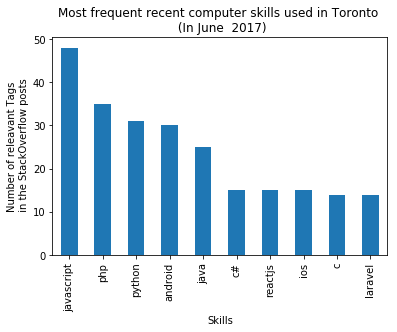

In [11]:
fig = dM5.plot.bar(title = 'Most frequent recent computer skills used in Toronto \n (In June  2017)');
fig.legend_.remove();
fig.set_xlabel("Skills");
fig.set_ylabel("Number of releavant Tags\n in the StackOverflow posts");

            June 2018  May18  April18
android          38.0   31.0     30.0
c                 NaN    NaN     14.0
c#                NaN   12.0     15.0
html             12.0   18.0      NaN
ios              34.0   18.0     15.0
java             23.0   40.0     25.0
javascript       34.0   35.0     48.0
jquery           10.0   17.0      NaN
laravel           NaN   13.0     14.0
php              22.0   32.0     35.0
python           41.0   46.0     31.0
reactjs           NaN    NaN     15.0
swift            19.0    NaN      NaN
xcode            15.0    NaN      NaN


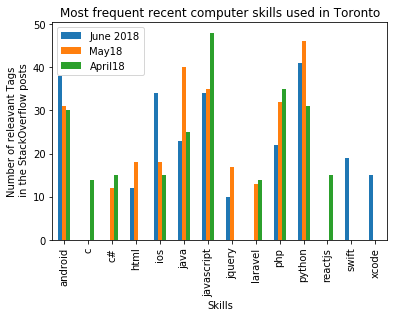

In [12]:
result = pd.concat([dJune18, dMay18, dApril18], axis=1, join='outer')
symbols = ['June 2018', 'May18','April18']
result.columns = symbols
print(result)
fig = result.plot.bar(title = 'Most frequent recent computer skills used in Toronto');
fig.set_xlabel("Skills");
fig.set_ylabel("Number of releavant Tags\n in the StackOverflow posts");
